<a href="https://colab.research.google.com/github/anthonywu2000/Human-Activity-Recognition-/blob/main/Human_Activity_Recognition_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt

import warnings

# **Importing Dataset**

In [2]:
# importing files via pandas
df_train = pd.read_csv('/train.csv')
df_test = pd.read_csv('/test.csv')

In [ ]:
print(df_train.shape)
print(df_test.shape)
df_train.head(n = 10)

In [ ]:
df_test.head(n = 10)

# **Dataset Cleaning and Checking**

In [ ]:
df_train.describe()

No outliers, as the values are squeezed between -1 and 1 (min and max)

In [ ]:
# check for duplicate values
print("Duplicated rows in training set: {} \n" .format(sum(df_train.duplicated())))
print("Duplicated rows in test set: {} \n" .format(sum(df_test.duplicated())))

In [ ]:
# check for null values
print("Nulls in  in training set: {} \n" .format(df_train.isnull().values.sum()))
print("Nulls in  in training set: {} \n" .format(df_test.isnull().values.sum()))

The results above shows that no data cleaning needs to be done, as there are no null and duplicate values.

Below, we can change the column names for simplificationn

In [25]:
columnsTrain = df_train.columns # or test is fine

columnsTrain = columnsTrain.str.replace('[()]', '') # Python in-built str to replace chars
columnsTrain = columnsTrain.str.replace('[-]', '')
columnsTrain = columnsTrain.str.replace('[,]', '')

df_train.columns = columnsTrain
df_test.columns = columnsTrain

df_train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagentropy,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1.0,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1.0,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.871914,-0.995031,-0.995127,-0.994640,-0.996060,-0.995866,-0.995031,-0.999973,-0.993755,-1.000000,-0.555556,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1.0,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982

# **Data Visualization and Data Exploration**

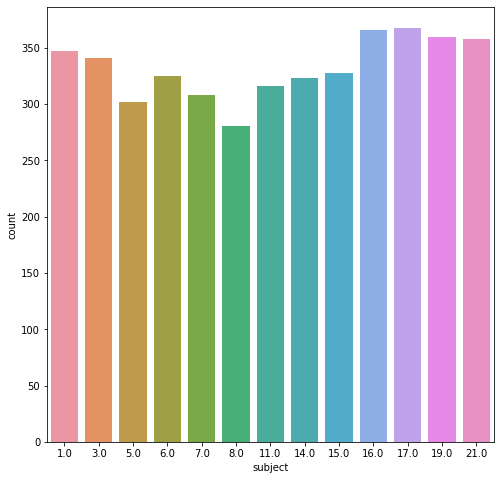

In [7]:
plt.figure(figsize = (8,8))
sns.countplot(x='subject', data = df_train)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

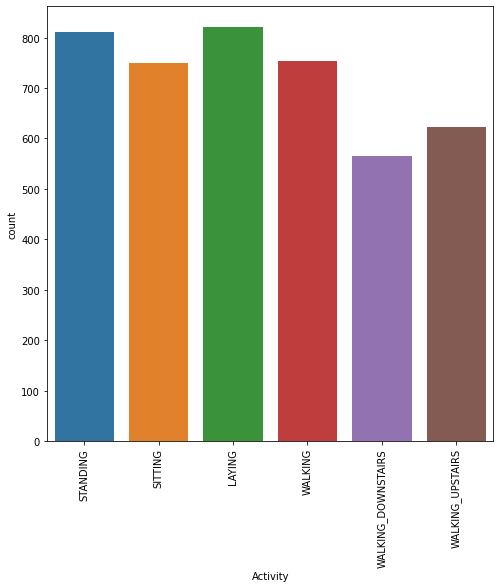

In [13]:
plt.figure(figsize = (8,8))
sns.countplot(x='Activity', data = df_train)
plt.xticks(rotation = 90)

The two graphs above shows the countplot for categorical variables. It is observed that the distributions for each category are roughly equal, so there is no huge gap among the number of data for each categories.

We can check a more advanced countplot below that combines the information from the above two plots.

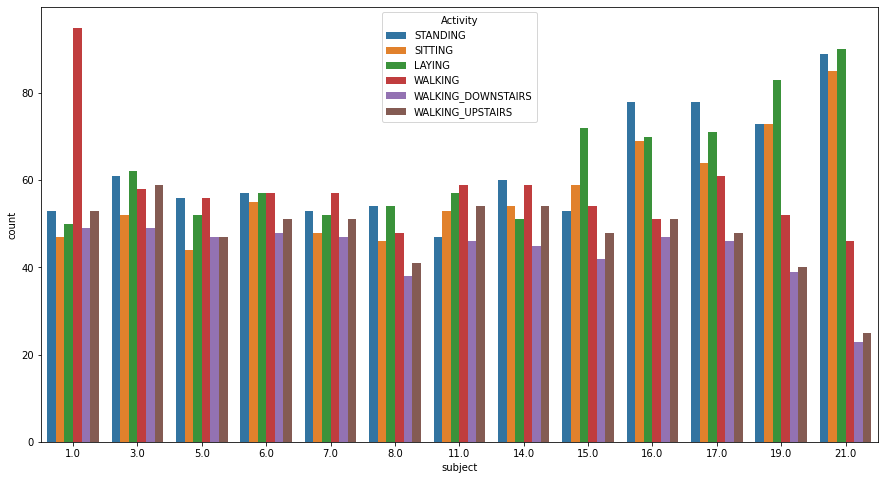

In [14]:
plt.figure(figsize = (15, 8))
sns.countplot(x='subject', hue='Activity', data = df_train)

We can also plot Kernel Density Plot to visualize the probability distributions as smoothed density curves for each of the features.
For simplicity, only selected features are plotted. 

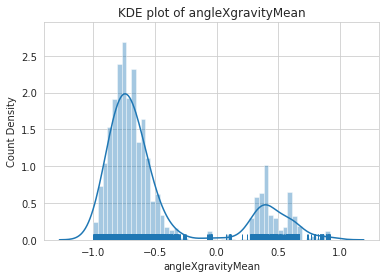

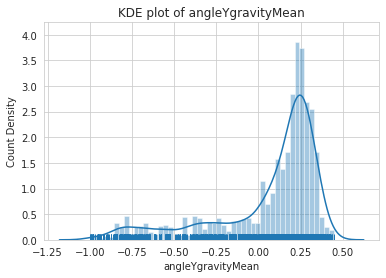

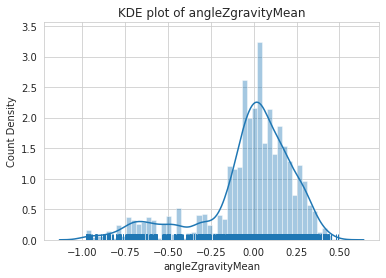

In [20]:
def plot_density(data, features, bins = 50, hist = True):
  for feature in features:
    sns.set_style("whitegrid")
    sns.distplot(data[feature], bins = bins, rug = True, hist = hist)
    plt.title("KDE plot of " + feature)
    plt.xlabel(feature)
    plt.ylabel('Count Density')
    warnings.filterwarnings('ignore')
    plt.show()

sample_features_1 = ['angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean']
plot_density(df_train, sample_features_1)


In order to show relationships between categorical and numerical variables, we can show the distributions via Box Plots and Violine Plots.

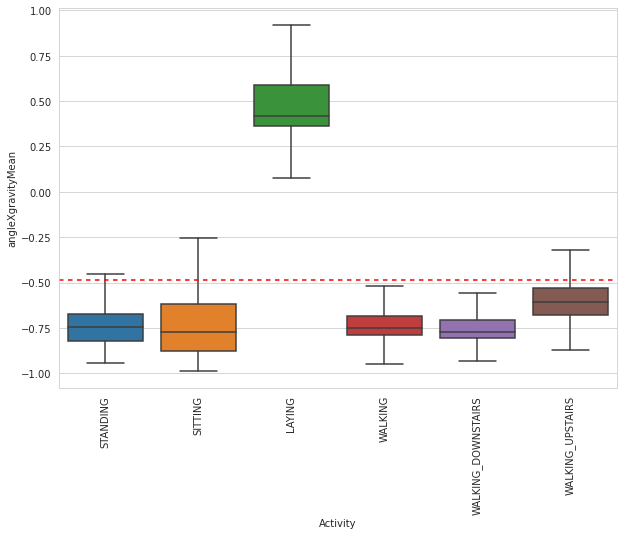

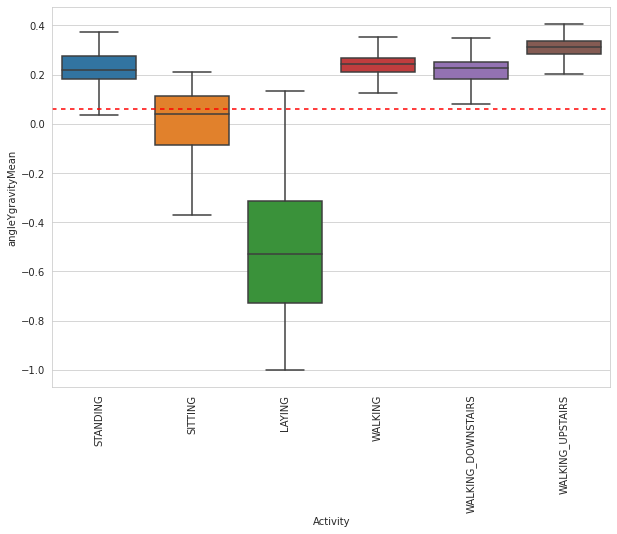

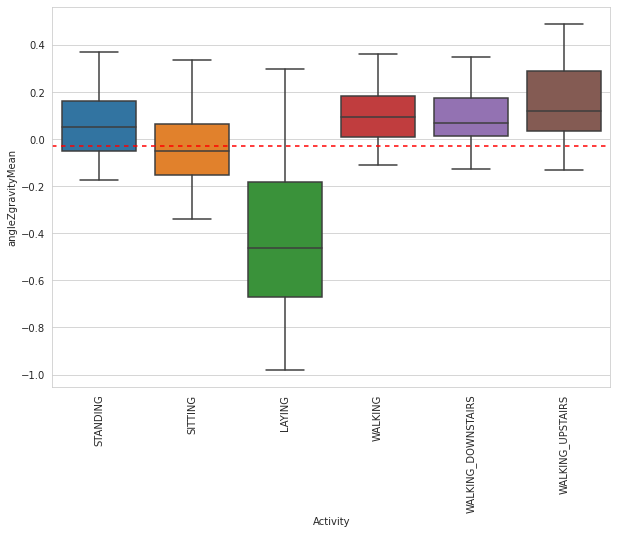

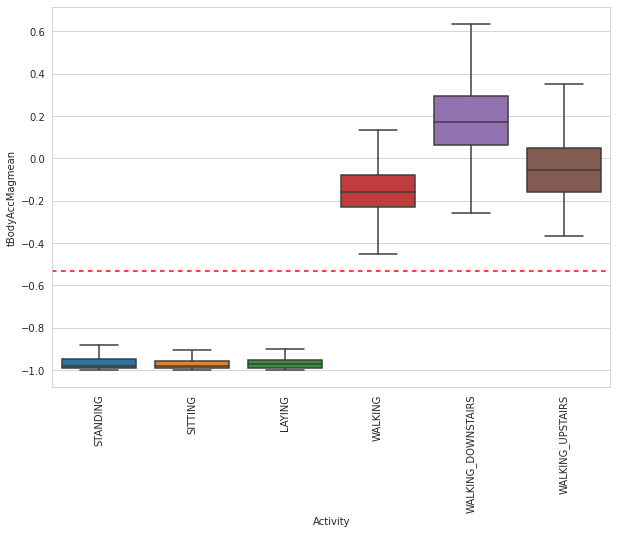

In [26]:
def plot_box(data, features, x = 'Activity'):
  for feature in features: 
    plt.figure(figsize = (10, 7))
    sns.set_style("whitegrid")
    sns.boxplot(x = x, data = df_train, y = data[feature], showfliers = False)
    plt.axhline(y = np.mean(data[feature]), dashes = (3,3), color = 'red')
    plt.xlabel('Activity')
    plt.ylabel(feature)
    plt.xticks(rotation = 90)
    plt.show()

sample_features_1.append('tBodyAccMagmean')
plot_box(df_train, sample_features_1)

As shown, the features shown for the activity "Laying" seems to have data points that are far away from the mean of the features (shown in red dash). We can almost be certain that if angleXgravityMean is greater than or equal to 0, then the activity is "Laying". Some of the outliers in angleYgravityMean boxplot does not lead to the assumption that if  angleYgravityMean is below some certain value, then it must be a "Laying" activity. This observation also  applies to angleZgravityMean, as some portion of the values in angleZgravityMean for "Laying" overlaps with "Sitting".

(TODO: add tBodyAccMagmean explanation)

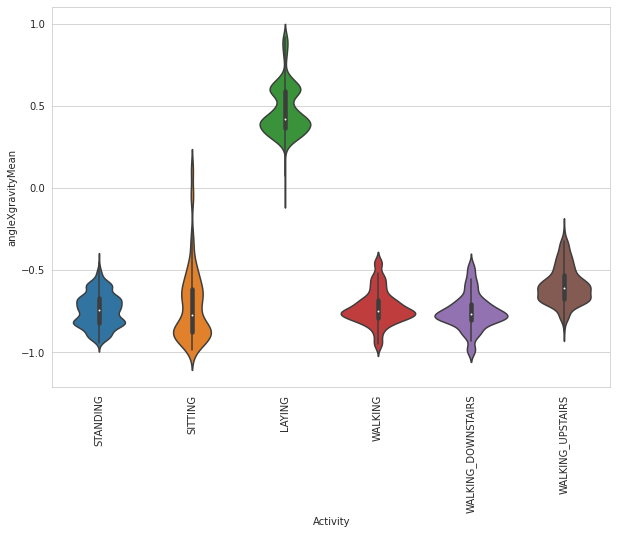

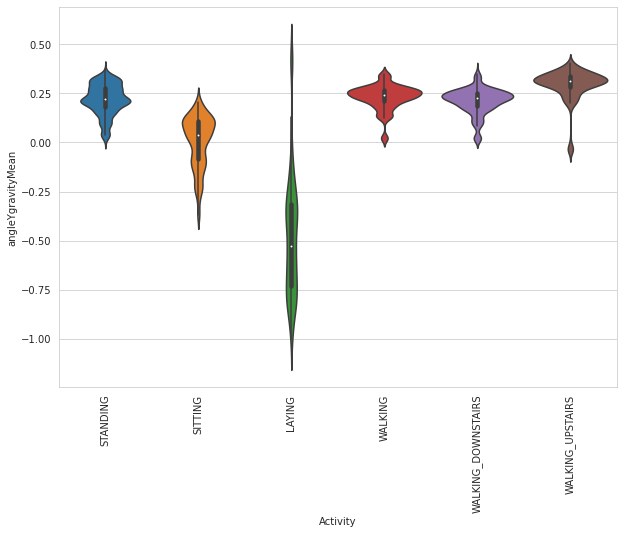

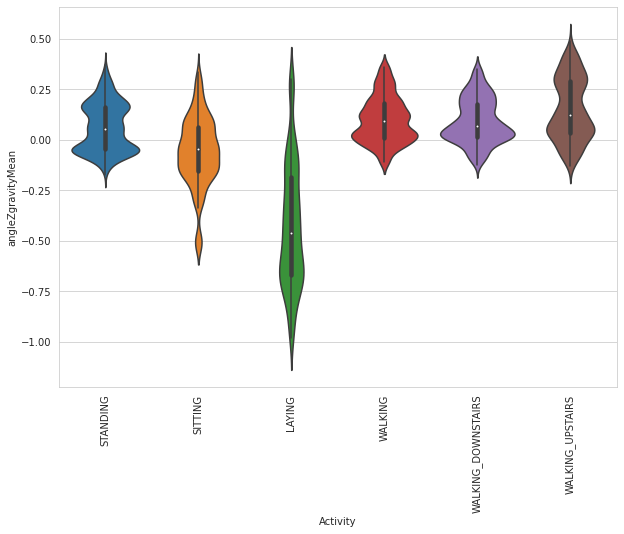

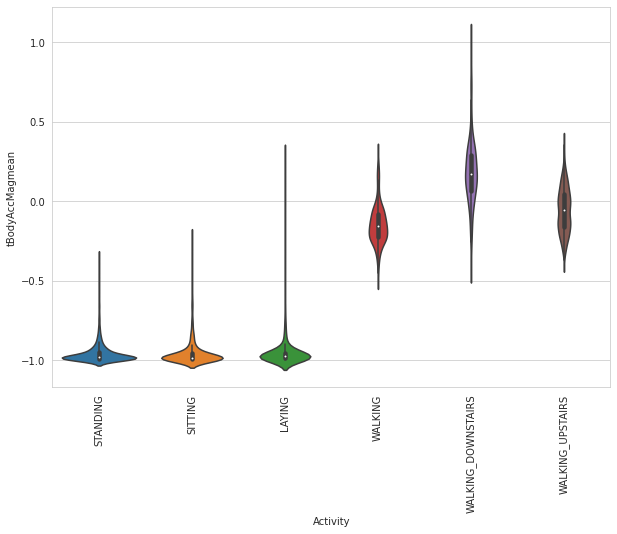

In [27]:
def plot_violin(data, features, x = 'Activity'):
  for feature in features:
    plt.figure(figsize = (10, 7))
    sns.set_style("whitegrid")
    sns.violinplot(x = x, data = df_train, y = data[feature])
    plt.xlabel('Activity')
    plt.ylabel(feature)
    plt.xticks(rotation = 90)
    plt.show()

plot_violin(df_train, sample_features_1)

Due to the high-dimensionality nature of the data, it would be efficient to visualize data through t-SNE by reducing dimensionality and retaining actual information. Each of the high-dimensional object is modelled into a two dimension object where similar objects are modelled by nearby points and dissimilar objects are modellede by distant points. (TODO: NEED RESEARCH!)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html read this
from sklearn.manifold import TSNE